In [1]:

# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('life-expectancy-722').getOrCreate()

In [2]:
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType, DoubleType)

data_schema = [StructField('Country',StringType(),True),
              StructField('Year',IntegerType(),True),
              StructField('Life expectancy ', DoubleType(), True),
              StructField('Adult Mortality', DoubleType(), True),
              StructField('infant deaths', DoubleType(), True),
              StructField('Hepatitis B', DoubleType(), True),
              StructField('Measles', DoubleType(), True),
              StructField(' BMI ', DoubleType(), True),
              StructField('under-five deaths', DoubleType(), True),
              StructField('Polio', DoubleType(), True),
              StructField('Diphtheria', DoubleType(), True),
              StructField(' HIV/AIDS', DoubleType(), True),
              StructField(' thinness  1-19 years', DoubleType(), True),
              StructField(' thinness 5-9 years', DoubleType(), True)]
final_struct = StructType(fields=data_schema)
df = spark.read.csv('../datasets/who-data.csv', header="true", schema=final_struct)
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: double (nullable = true)
 |-- infant deaths: double (nullable = true)
 |-- Hepatitis B: double (nullable = true)
 |-- Measles: double (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths: double (nullable = true)
 |-- Polio: double (nullable = true)
 |-- Diphtheria: double (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)



In [3]:
from pyspark.sql.functions import mean, stddev, min, max
import pandas as pd

columns = df.drop(*['Year', 'Country']).columns
frame = pd.DataFrame(columns=['Column', 'Mean', 'Standard Diviation', 'Min', 'Max'])
for col in columns:
    dfMean = df.select(mean(df[col])).collect()
    dfStd = df.select(stddev(df[col])).collect()
    dfMin = df.select(min(df[col])).collect()
    dfMax = df.select(max(df[col])).collect()
    frame = frame.append({'Column': col, 'Mean': dfMean[0][0], 'Standard Diviation': dfStd[0][0], 
                          'Min': dfMin[0][0], 'Max': dfMax[0][0]}, ignore_index=True)

print(frame)

                   Column         Mean  Standard Diviation   Min       Max
0        Life expectancy     69.224932            9.523867  36.3      89.0
1         Adult Mortality   164.796448          124.292079   1.0     723.0
2           infant deaths    30.303948          117.926501   0.0    1800.0
3             Hepatitis B    80.940461           25.070016   1.0      99.0
4                 Measles  2419.592240        11467.272489   0.0  212183.0
5                    BMI     38.321247           20.044034   1.0      87.3
6       under-five deaths    42.035739          160.445548   0.0    2500.0
7                   Polio    82.550188           23.428046   3.0      99.0
8              Diphtheria    82.324084           23.716912   2.0      99.0
9                HIV/AIDS     1.742103            5.077785   0.1      50.6
10   thinness  1-19 years     4.839704            4.420195   0.1      27.7
11     thinness 5-9 years     4.870317            4.508882   0.1      28.6


In [4]:
df.filter('Year = 2000').describe('Life expectancy ').show()

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|              183|
|   mean|66.75027322404374|
| stddev|10.29552807176916|
|    min|             39.0|
|    max|             81.1|
+-------+-----------------+



In [5]:
df.filter('Year = 2015').describe('Life expectancy ').show()

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|              183|
|   mean|71.61693989071036|
| stddev|8.123706147645304|
|    min|             51.0|
|    max|             88.0|
+-------+-----------------+



In [6]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+-------+----+----------------+---------------+-------------+-----------+-------+-----+-----------------+-----+----------+---------+---------------------+-------------------+
|Country|Year|Life expectancy |Adult Mortality|infant deaths|Hepatitis B|Measles| BMI |under-five deaths|Polio|Diphtheria| HIV/AIDS| thinness  1-19 years| thinness 5-9 years|
+-------+----+----------------+---------------+-------------+-----------+-------+-----+-----------------+-----+----------+---------+---------------------+-------------------+
|      0|   0|              10|             10|            0|        553|      0|   34|                0|   19|        19|        0|                   34|                 34|
+-------+----+----------------+---------------+-------------+-----------+-------+-----+-----------------+-----+----------+---------+---------------------+-------------------+



In [7]:
data_schema = [StructField('Country',StringType(),True),
              StructField('Year',IntegerType(),True),
              StructField('Status', StringType(), True),
              StructField('Alcohol', DoubleType(), True),
              StructField('percentage expenditure', DoubleType(), True),
              StructField('Total expenditure', DoubleType(), True),
              StructField('GDP', DoubleType(), True),
              StructField('Population', DoubleType(), True),
              StructField('Income composition of resources', DoubleType(), True),
              StructField('Schooling', DoubleType(), True)]
final_struct = StructType(fields=data_schema)
df2 = spark.read.csv('../datasets/UN Data.csv', header="true", schema=final_struct)
df2.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



In [8]:
df2.show()

+-----------+----+----------+-------+----------------------+-----------------+-----------+-----------+-------------------------------+---------+
|    Country|Year|    Status|Alcohol|percentage expenditure|Total expenditure|        GDP| Population|Income composition of resources|Schooling|
+-----------+----+----------+-------+----------------------+-----------------+-----------+-----------+-------------------------------+---------+
|Afghanistan|2015|Developing|   0.01|           71.27962362|             8.16|  584.25921|3.3736494E7|                          0.479|     10.1|
|Afghanistan|2014|Developing|   0.01|           73.52358168|             8.18| 612.696514|   327582.0|                          0.476|     10.0|
|Afghanistan|2013|Developing|   0.01|           73.21924272|             8.13| 631.744976|3.1731688E7|                           0.47|      9.9|
|Afghanistan|2012|Developing|   0.01|            78.1842153|             8.52|    669.959|  3696958.0|                          0.

In [9]:
columns = df2.drop(*['Year', 'Country', 'Status']).columns
frame = pd.DataFrame(columns=['Column', 'Mean', 'Standard Diviation', 'Min', 'Max'])
for col in columns:
    dfMean = df2.select(mean(df2[col])).collect()
    dfStd = df2.select(stddev(df2[col])).collect()
    dfMin = df2.select(min(df2[col])).collect()
    dfMax = df2.select(max(df2[col])).collect()
    frame = frame.append({'Column': col, 'Mean': dfMean[0][0], 'Standard Diviation': dfStd[0][0], 
                          'Min': dfMin[0][0], 'Max': dfMax[0][0]}, ignore_index=True)

print(frame)

                            Column          Mean  Standard Diviation  \
0                          Alcohol  4.602861e+00        4.052413e+00   
1           percentage expenditure  7.382513e+02        1.987915e+03   
2                Total expenditure  5.938190e+00        2.498320e+00   
3                              GDP  7.483158e+03        1.427017e+04   
4                       Population  1.275338e+07        6.101210e+07   
5  Income composition of resources  6.275511e-01        2.109036e-01   
6                        Schooling  1.199279e+01        3.358920e+00   

        Min           Max  
0   0.01000  1.787000e+01  
1   0.00000  1.947991e+04  
2   0.37000  1.760000e+01  
3   1.68135  1.191727e+05  
4  34.00000  1.293859e+09  
5   0.00000  9.480000e-01  
6   0.00000  2.070000e+01  


In [10]:
from pyspark.sql.types import (StructField)
import pandas as pd
columns = df.drop(*['Year', 'Country']).columns
for col1 in columns:
    correlationMatrix = pd.DataFrame(columns=['Column', 'Coeff', 'Category'])
    for col2 in columns:
        if col1 != col2:
            correlation = df.stat.corr(col1, col2)
            cat = 'Strong' if abs(correlation) > 0.7 else 'Weak'
            correlationMatrix = correlationMatrix.append({'Column': col2, 'Coeff': correlation, 'Category': cat}, ignore_index=True)
    print('##############')
    print(col1)
    print(correlationMatrix)


##############
Life expectancy 
                   Column     Coeff Category
0         Adult Mortality -0.609053     Weak
1           infant deaths -0.175069     Weak
2             Hepatitis B  0.220782     Weak
3                 Measles -0.140250     Weak
4                    BMI   0.507116     Weak
5       under-five deaths -0.198861     Weak
6                   Polio  0.427613     Weak
7              Diphtheria  0.439868     Weak
8                HIV/AIDS -0.504904     Weak
9    thinness  1-19 years -0.397560     Weak
10     thinness 5-9 years -0.392858     Weak
##############
Adult Mortality
                   Column     Coeff Category
0        Life expectancy  -0.609053     Weak
1           infant deaths  0.079671     Weak
2             Hepatitis B -0.136102     Weak
3                 Measles  0.032032     Weak
4                    BMI  -0.397616     Weak
5       under-five deaths  0.095036     Weak
6                   Polio -0.280854     Weak
7              Diphtheria -0.281226  

In [11]:
df = df.drop(*['infant deaths', ' thinness 5-9 years'])
print(df.columns)

['Country', 'Year', 'Life expectancy ', 'Adult Mortality', 'Hepatitis B', 'Measles', ' BMI ', 'under-five deaths', 'Polio', 'Diphtheria', ' HIV/AIDS', ' thinness  1-19 years']


In [12]:
df = df.na.drop(subset="Life expectancy ")

In [13]:
from pyspark.sql.functions import mean
meanHep = df.select(mean(df['Hepatitis B'])).collect()
meanBMI = df.select(mean(df[' BMI '])).collect()
meanPolio = df.select(mean(df['Polio'])).collect()
meanDiph = df.select(mean(df['Diphtheria'])).collect()
meanthin = df.select(mean(df[' thinness  1-19 years'])).collect()
df = df.na.fill(meanHep[0][0], subset=['Hepatitis B'])
df = df.na.fill(meanBMI[0][0], subset=[' BMI '])
df = df.na.fill(meanPolio[0][0], subset=['Polio'])
df = df.na.fill(meanDiph[0][0], subset=['Diphtheria'])
df = df.na.fill(meanDiph[0][0], subset=[' thinness  1-19 years'])


In [14]:
df = df.drop(*[' BMI '])
print(df.columns)

['Country', 'Year', 'Life expectancy ', 'Adult Mortality', 'Hepatitis B', 'Measles', 'under-five deaths', 'Polio', 'Diphtheria', ' HIV/AIDS', ' thinness  1-19 years']


In [15]:
print(df.columns)
print(df2.columns)

['Country', 'Year', 'Life expectancy ', 'Adult Mortality', 'Hepatitis B', 'Measles', 'under-five deaths', 'Polio', 'Diphtheria', ' HIV/AIDS', ' thinness  1-19 years']
['Country', 'Year', 'Status', 'Alcohol', 'percentage expenditure', 'Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling']


In [16]:
dfMerged = df.join(df2, ['Country', 'Year'], 'inner')
dfMerged.show()

+-----------+----+----------------+---------------+-----------+-------+-----------------+-----+----------+---------+---------------------+----------+-------+----------------------+-----------------+-----------+-----------+-------------------------------+---------+
|    Country|Year|Life expectancy |Adult Mortality|Hepatitis B|Measles|under-five deaths|Polio|Diphtheria| HIV/AIDS| thinness  1-19 years|    Status|Alcohol|percentage expenditure|Total expenditure|        GDP| Population|Income composition of resources|Schooling|
+-----------+----+----------------+---------------+-----------+-------+-----------------+-----+----------+---------+---------------------+----------+-------+----------------------+-----------------+-----------+-----------+-------------------------------+---------+
|Afghanistan|2015|            65.0|          263.0|       65.0| 1154.0|             83.0|  6.0|      65.0|      0.1|                 17.2|Developing|   0.01|           71.27962362|             8.16|  584.2

In [17]:
print(dfMerged.columns)

['Country', 'Year', 'Life expectancy ', 'Adult Mortality', 'Hepatitis B', 'Measles', 'under-five deaths', 'Polio', 'Diphtheria', ' HIV/AIDS', ' thinness  1-19 years', 'Status', 'Alcohol', 'percentage expenditure', 'Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling']


In [18]:
columns = dfMerged.drop(*['Year', 'Country', 'Status']).columns
for col1 in columns:
    correlationMatrix = pd.DataFrame(columns=['Column', 'Coeff', 'Category'])
    for col2 in columns:
        if col1 != col2:
            correlation = dfMerged.stat.corr(col1, col2)
            cat = 'Strong' if abs(correlation) > 0.7 else 'Weak'
            correlationMatrix = correlationMatrix.append({'Column': col2, 'Coeff': correlation, 'Category': cat}, ignore_index=True)
    print('##############')
    print(col1)
    print(correlationMatrix)

##############
Life expectancy 
                             Column     Coeff Category
0                   Adult Mortality -0.690332     Weak
1                       Hepatitis B  0.199664     Weak
2                           Measles -0.159843     Weak
3                 under-five deaths -0.221951     Weak
4                             Polio  0.461302     Weak
5                        Diphtheria  0.476581     Weak
6                          HIV/AIDS -0.556661     Weak
7              thinness  1-19 years -0.339114     Weak
8                           Alcohol  0.370456     Weak
9            percentage expenditure  0.382148     Weak
10                Total expenditure  0.176434     Weak
11                              GDP  0.428908     Weak
12                       Population -0.032304     Weak
13  Income composition of resources  0.589494     Weak
14                        Schooling  0.574154     Weak
##############
Adult Mortality
                             Column     Coeff Category
0 

##############
percentage expenditure
                             Column     Coeff Category
0                  Life expectancy   0.382148     Weak
1                   Adult Mortality -0.241981     Weak
2                       Hepatitis B  0.010593     Weak
3                           Measles -0.056987     Weak
4                 under-five deaths -0.087637     Weak
5                             Polio  0.146826     Weak
6                        Diphtheria  0.143205     Weak
7                          HIV/AIDS -0.097210     Weak
8              thinness  1-19 years -0.152528     Weak
9                           Alcohol  0.352938     Weak
10                Total expenditure  0.205634     Weak
11                              GDP  0.901603   Strong
12                       Population -0.016515     Weak
13  Income composition of resources  0.364601     Weak
14                        Schooling  0.357999     Weak
##############
Total expenditure
                             Column     Coeff Cat

In [19]:
dfMerged = dfMerged.drop(*['Income composition of resources', 'percentage expenditure'])
print(dfMerged.columns)

['Country', 'Year', 'Life expectancy ', 'Adult Mortality', 'Hepatitis B', 'Measles', 'under-five deaths', 'Polio', 'Diphtheria', ' HIV/AIDS', ' thinness  1-19 years', 'Status', 'Alcohol', 'Total expenditure', 'GDP', 'Population', 'Schooling']


In [20]:
meanschooling = dfMerged.select(mean(dfMerged['Schooling'])).collect()
meanpopulation = dfMerged.select(mean(dfMerged['Population'])).collect()
meangdp = dfMerged.select(mean(dfMerged['GDP'])).collect()
meantotexp = dfMerged.select(mean(dfMerged['Total expenditure'])).collect()
meanalcohol = dfMerged.select(mean(dfMerged['Alcohol'])).collect()
dfMerged = dfMerged.na.fill(meanschooling[0][0], subset=['Schooling'])
dfMerged = dfMerged.na.fill(meanpopulation[0][0], subset=['Population'])
dfMerged = dfMerged.na.fill(meangdp[0][0], subset=['GDP'])
dfMerged = dfMerged.na.fill(meantotexp[0][0], subset=['Total expenditure'])
dfMerged = dfMerged.na.fill(meanalcohol[0][0], subset=['Alcohol'])


In [21]:
dfMerged = dfMerged.sort("Country", "Year")
dfMerged.show()

+-----------+----+----------------+---------------+-----------+-------+-----------------+-----+----------+---------+---------------------+----------+-------+-----------------+-----------+-----------+---------+
|    Country|Year|Life expectancy |Adult Mortality|Hepatitis B|Measles|under-five deaths|Polio|Diphtheria| HIV/AIDS| thinness  1-19 years|    Status|Alcohol|Total expenditure|        GDP| Population|Schooling|
+-----------+----+----------------+---------------+-----------+-------+-----------------+-----+----------+---------+---------------------+----------+-------+-----------------+-----------+-----------+---------+
|Afghanistan|2000|            54.8|          321.0|       62.0| 6532.0|            122.0| 24.0|      24.0|      0.1|                  2.3|Developing|   0.01|              8.2|     114.56|   293756.0|      5.5|
|Afghanistan|2001|            55.3|          316.0|       63.0| 8762.0|            122.0| 35.0|      33.0|      0.1|                  2.1|Developing|   0.01|   

In [22]:
dfMerged = dfMerged.toDF(*['country', 'year', 'life-expectancy', 'adult-mortality', 'hepatitis-b', 'measles', 
                           'under-five-deaths', 'polio', 'diphtheria', ' hiv-aids', ' thinness-1-19-years', 
                           'status', 'alcohol', 'total-expenditure', 'gdp', 'population', 
                           'schooling'])
dfMerged.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- life-expectancy: double (nullable = true)
 |-- adult-mortality: double (nullable = true)
 |-- hepatitis-b: double (nullable = false)
 |-- measles: double (nullable = true)
 |-- under-five-deaths: double (nullable = true)
 |-- polio: double (nullable = false)
 |-- diphtheria: double (nullable = false)
 |--  hiv-aids: double (nullable = true)
 |--  thinness-1-19-years: double (nullable = false)
 |-- status: string (nullable = true)
 |-- alcohol: double (nullable = false)
 |-- total-expenditure: double (nullable = false)
 |-- gdp: double (nullable = false)
 |-- population: double (nullable = false)
 |-- schooling: double (nullable = false)



In [23]:
print(dfMerged.columns)

['country', 'year', 'life-expectancy', 'adult-mortality', 'hepatitis-b', 'measles', 'under-five-deaths', 'polio', 'diphtheria', ' hiv-aids', ' thinness-1-19-years', 'status', 'alcohol', 'total-expenditure', 'gdp', 'population', 'schooling']


In [24]:
columns = dfMerged.drop(*['Year', 'Country', 'Status']).columns
correlationMatrix = pd.DataFrame(columns=['Column', 'Coeff', 'Category'])
for col1 in columns:
    correlation = dfMerged.stat.corr(col1, 'life-expectancy')
    cat = 'Strong' if abs(correlation) > 0.1 else 'Weak'
    correlationMatrix = correlationMatrix.append({'Column': col1, 'Coeff': correlation, 'Category': cat}, ignore_index=True)
print('life-expectancy')
print(correlationMatrix)

life-expectancy
                  Column     Coeff Category
0        life-expectancy  1.000000   Strong
1        adult-mortality -0.690332   Strong
2            hepatitis-b  0.199664   Strong
3                measles -0.159843   Strong
4      under-five-deaths -0.221951   Strong
5                  polio  0.461302   Strong
6             diphtheria  0.476581   Strong
7               hiv-aids -0.556661   Strong
8    thinness-1-19-years -0.339114   Strong
9                alcohol  0.392390   Strong
10     total-expenditure  0.210886   Strong
11                   gdp  0.435316   Strong
12            population -0.019846     Weak
13             schooling  0.726567   Strong


In [25]:
dfMerged = dfMerged.drop(*['population'])
print(dfMerged.columns)

['country', 'year', 'life-expectancy', 'adult-mortality', 'hepatitis-b', 'measles', 'under-five-deaths', 'polio', 'diphtheria', ' hiv-aids', ' thinness-1-19-years', 'status', 'alcohol', 'total-expenditure', 'gdp', 'schooling']


In [26]:
from pyspark.ml.feature import Bucketizer
dfMerged = dfMerged.drop(*['schooling_binned'])
splits = [-1.5, 1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5]
bucketizer = Bucketizer(splits=splits, inputCol="schooling", outputCol="schooling_binned")
dfMerged = bucketizer.transform(dfMerged)

In [27]:
dfMerged = dfMerged.drop(*['alcohol_binned'])
splits = [-8, -5, -2, 1, 4, 7, 10, 13, 16, 19, 22]
bucketizer = Bucketizer(splits=splits, inputCol="alcohol", outputCol="alcohol_binned")
dfMerged = bucketizer.transform(dfMerged)

In [28]:
dfMerged = dfMerged.drop(*['schooling', 'alcohol'])
print(dfMerged.columns)

['country', 'year', 'life-expectancy', 'adult-mortality', 'hepatitis-b', 'measles', 'under-five-deaths', 'polio', 'diphtheria', ' hiv-aids', ' thinness-1-19-years', 'status', 'total-expenditure', 'gdp', 'schooling_binned', 'alcohol_binned']


In [29]:
columnsToScale = ['adult-mortality', 'hepatitis-b', 'measles', 'under-five-deaths', 'polio', 'diphtheria', 
                  ' hiv-aids', ' thinness-1-19-years', 'total-expenditure', 'gdp']
for col in columnsToScale:
    print(col)
    meanCol = dfMerged.agg({col: 'mean'}).collect()[0][0]
    stdDiv = dfMerged.agg({col: 'stddev'}).collect()[0][0]
    print(meanCol)
    print(stdDiv)
    newColName = col + '-scaled'
    dfMerged = dfMerged.withColumn(newColName, (dfMerged[col] - meanCol) / (stdDiv))

adult-mortality
163.40899725274724
122.99388187685773
hepatitis-b
81.04855248698674
22.487562743076367
measles
2431.809752747253
11516.031592203795
under-five-deaths
41.934065934065934
161.10697166058083
polio
82.63956650731531
23.306175119568522
diphtheria
82.39495429587602
23.638027540309373
 hiv-aids
1.7315590659340667
5.092939378070892
 thinness-1-19-years
5.69158149773911
9.202248682311902
total-expenditure
5.931317454410123
2.3915436398231917
gdp
7494.210719388654
13193.237156034336


In [30]:
from pyspark.sql.functions import isnan, when, count, col
dfMerged = dfMerged.drop(*['adult-mortality', 'hepatitis-b', 'measles', 'under-five-deaths', 'polio', 'diphtheria', 
                  ' hiv-aids', ' thinness-1-19-years', 'total-expenditure', 'gdp'])
dfMerged.select([count(when(isnan(c), c)).alias(c) for c in dfMerged.columns]).show()

+-------+----+---------------+------+----------------+--------------+----------------------+------------------+--------------+------------------------+------------+-----------------+----------------+---------------------------+------------------------+----------+
|country|year|life-expectancy|status|schooling_binned|alcohol_binned|adult-mortality-scaled|hepatitis-b-scaled|measles-scaled|under-five-deaths-scaled|polio-scaled|diphtheria-scaled| hiv-aids-scaled| thinness-1-19-years-scaled|total-expenditure-scaled|gdp-scaled|
+-------+----+---------------+------+----------------+--------------+----------------------+------------------+--------------+------------------------+------------+-----------------+----------------+---------------------------+------------------------+----------+
|      0|   0|              0|     0|               0|             0|                     0|                 0|             0|                       0|           0|                0|               0|         

In [31]:
print(dfMerged.columns)

['country', 'year', 'life-expectancy', 'status', 'schooling_binned', 'alcohol_binned', 'adult-mortality-scaled', 'hepatitis-b-scaled', 'measles-scaled', 'under-five-deaths-scaled', 'polio-scaled', 'diphtheria-scaled', ' hiv-aids-scaled', ' thinness-1-19-years-scaled', 'total-expenditure-scaled', 'gdp-scaled']


In [32]:
dfMerged.select('status').show()

+----------+
|    status|
+----------+
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
|Developing|
+----------+
only showing top 20 rows



In [33]:
dfMerged = dfMerged.withColumn('status-encoded', (dfMerged['status'] == 'Developed').cast('integer'))
dfMerged.select('status-encoded').show()
dfMerged.drop(*['statusx '])

+--------------+
|status-encoded|
+--------------+
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
+--------------+
only showing top 20 rows



DataFrame[country: string, year: int, life-expectancy: double, status: string, schooling_binned: double, alcohol_binned: double, adult-mortality-scaled: double, hepatitis-b-scaled: double, measles-scaled: double, under-five-deaths-scaled: double, polio-scaled: double, diphtheria-scaled: double,  hiv-aids-scaled: double,  thinness-1-19-years-scaled: double, total-expenditure-scaled: double, gdp-scaled: double, status-encoded: int]

In [37]:
dfMerged = dfMerged.drop(*['country', 'year', 'status'])
print(dfMerged.columns)

['life-expectancy', 'status', 'schooling_binned', 'alcohol_binned', 'adult-mortality-scaled', 'hepatitis-b-scaled', 'measles-scaled', 'under-five-deaths-scaled', 'polio-scaled', 'diphtheria-scaled', ' hiv-aids-scaled', ' thinness-1-19-years-scaled', 'total-expenditure-scaled', 'gdp-scaled', 'status-encoded']


In [168]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

dfMerged.printSchema()
inputFeatures = ['schooling_binned', 'alcohol_binned', 'adult-mortality-scaled', 
               'hepatitis-b-scaled', 'measles-scaled', 'under-five-deaths-scaled', 'polio-scaled', 
               'diphtheria-scaled', ' hiv-aids-scaled', ' thinness-1-19-years-scaled', 'total-expenditure-scaled', 
               'gdp-scaled', 'status-encoded']
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=inputFeatures,
    outputCol="features")
output = assembler.transform(dfMerged)
output.printSchema()
output.head(1)

root
 |-- life-expectancy: double (nullable = true)
 |-- status: string (nullable = true)
 |-- schooling_binned: double (nullable = true)
 |-- alcohol_binned: double (nullable = true)
 |-- adult-mortality-scaled: double (nullable = true)
 |-- hepatitis-b-scaled: double (nullable = true)
 |-- measles-scaled: double (nullable = true)
 |-- under-five-deaths-scaled: double (nullable = true)
 |-- polio-scaled: double (nullable = true)
 |-- diphtheria-scaled: double (nullable = true)
 |--  hiv-aids-scaled: double (nullable = true)
 |--  thinness-1-19-years-scaled: double (nullable = true)
 |-- total-expenditure-scaled: double (nullable = true)
 |-- gdp-scaled: double (nullable = true)
 |-- status-encoded: integer (nullable = true)

root
 |-- life-expectancy: double (nullable = true)
 |-- status: string (nullable = true)
 |-- schooling_binned: double (nullable = true)
 |-- alcohol_binned: double (nullable = true)
 |-- adult-mortality-scaled: double (nullable = true)
 |-- hepatitis-b-scaled: d

[Row(life-expectancy=54.8, status='Developing', schooling_binned=2.0, alcohol_binned=2.0, adult-mortality-scaled=1.2812913971203372, hepatitis-b-scaled=-0.8470705653884854, measles-scaled=0.3560419415685281, under-five-deaths-scaled=0.4969737388808753, polio-scaled=-2.516052771699972, diphtheria-scaled=-2.4703818538283904,  hiv-aids-scaled=-0.3203570560763419,  thinness-1-19-years-scaled=-0.3685600786097247, total-expenditure-scaled=0.9486268650140968, gdp-scaled=-0.5593510244764562, status-encoded=0, features=DenseVector([2.0, 2.0, 1.2813, -0.8471, 0.356, 0.497, -2.5161, -2.4704, -0.3204, -0.3686, 0.9486, -0.5594, 0.0]))]

In [169]:
finalModelInputs = output.select('features', 'life-expectancy')
finalModelInputs.show()

+--------------------+---------------+
|            features|life-expectancy|
+--------------------+---------------+
|[2.0,2.0,1.281291...|           54.8|
|[2.0,2.0,1.240638...|           55.3|
|[2.0,2.0,-1.30420...|           56.2|
|[2.0,2.0,1.069898...|           56.7|
|[2.0,2.0,1.053637...|           57.0|
|[3.0,2.0,1.037376...|           57.3|
|[3.0,2.0,1.069898...|           57.3|
|[3.0,2.0,1.069898...|           57.5|
|[3.0,2.0,1.004854...|           58.1|
|[3.0,2.0,0.956071...|           58.6|
|[3.0,2.0,0.939810...|           58.8|
|[3.0,2.0,0.907289...|           59.2|
|[3.0,2.0,0.882897...|           59.5|
|[3.0,2.0,0.850375...|           59.9|
|[3.0,2.0,0.874767...|           59.9|
|[3.0,2.0,0.809723...|           65.0|
|[4.0,3.0,-1.23915...|           72.6|
|[4.0,4.0,-1.21476...|           73.6|
|[4.0,3.0,-1.20663...|           73.3|
|[4.0,4.0,-1.18224...|           72.8|
+--------------------+---------------+
only showing top 20 rows



In [170]:
from pyspark.ml.regression import LinearRegression
model = LinearRegression(labelCol='life-expectancy')

In [171]:
train_data,test_data = finalModelInputs.randomSplit([0.7,0.3])

train_data.describe().show()
test_data.describe().show()

+-------+-----------------+
|summary|  life-expectancy|
+-------+-----------------+
|  count|             2015|
|   mean|69.50818858560798|
| stddev|9.205887188731305|
|    min|             36.3|
|    max|             89.0|
+-------+-----------------+

+-------+-----------------+
|summary|  life-expectancy|
+-------+-----------------+
|  count|              897|
|   mean|68.92463768115942|
| stddev|9.956144095663904|
|    min|             39.0|
|    max|             89.0|
+-------+-----------------+



In [172]:
print(model.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: life-expectancy)
maxIter: max number of iterations (>= 0). (default: 100)
predictionCol: prediction column name. (default: prediction)
regParam: regularization parameter (>= 0). (default: 0.0)
solver: the solver algorithm for optimization. If this is not set or empty, default value is 'auto'. (default: auto)
standardization: whether to standardize the training features before fitting the model. (default: True)
tol: the convergence tolerance for iterative algorithms (>= 0). (default: 1e-06)
weightCol: weight column name. If this is not set or empty, we treat all instance weights as 1.

In [173]:
model = model.fit(train_data)

In [174]:
i = 0
for col in inputFeatures:
    print(col + ': ' + str(model.coefficients[i]))
    i = i + 1

schooling_binned: 2.531831721385968
alcohol_binned: 0.388132840016104
adult-mortality-scaled: -2.947233773516361
hepatitis-b-scaled: -0.4198538515246137
measles-scaled: -0.2201136751274389
under-five-deaths-scaled: -0.41661977241907844
polio-scaled: 0.8238180676561964
diphtheria-scaled: 1.2699219618597593
 hiv-aids-scaled: -2.443472249095295
 thinness-1-19-years-scaled: -0.12580509205567508
total-expenditure-scaled: 0.41017739769742
gdp-scaled: 0.8506772457520726
status-encoded: 1.3251672181685445


In [175]:
results = model.evaluate(test_data)
print("R2: {}".format(results.r2))

R2: 0.7790735324016946


In [176]:
results.residuals.show()
print("RSME: {}".format(results.rootMeanSquaredError))

+-------------------+
|          residuals|
+-------------------+
|-0.6508134800577849|
| -2.655537312845013|
|-3.9969005901984573|
| -4.148566482822282|
| -4.058416305569956|
| -3.881455715687075|
|-1.5971964689630767|
|-1.5522888951355895|
| 3.2502306371916347|
|  1.580441968411023|
| 1.7104373671797646|
| 1.9480629712895876|
| 2.6443568245055076|
| 1.2274653422982453|
| 1.9082424655163805|
| -3.194721175497449|
|-3.4516339803538187|
| -5.715751153594326|
| -6.382536274287048|
|-11.165585559441674|
+-------------------+
only showing top 20 rows

RSME: 4.67705881387351


In [177]:
results.predictions.select('prediction').show()

+------------------+
|        prediction|
+------------------+
| 57.35081348005779|
| 62.55553731284501|
| 62.09690059019846|
| 61.44856648282228|
|61.558416305569956|
| 61.18145571568707|
| 74.19719646896307|
| 74.35228889513559|
| 72.84976936280836|
| 75.61955803158898|
| 72.08956263282023|
| 69.35193702871041|
|  69.0556431754945|
| 73.67253465770176|
| 75.89175753448362|
| 50.29472117549745|
|50.251633980353816|
| 53.41575115359433|
| 53.78253627428705|
|60.765585559441675|
+------------------+
only showing top 20 rows



In [178]:
print("Mean Absolute Error: {}".format(results.meanAbsoluteError))

Mean Absolute Error: 3.495041655872656


Feature: 0, schooling_binned, Score: 2.53183
Feature: 1, alcohol_binned, Score: 0.38813
Feature: 2, adult-mortality-scaled, Score: -2.94723
Feature: 3, hepatitis-b-scaled, Score: -0.41985
Feature: 4, measles-scaled, Score: -0.22011
Feature: 5, under-five-deaths-scaled, Score: -0.41662
Feature: 6, polio-scaled, Score: 0.82382
Feature: 7, diphtheria-scaled, Score: 1.26992
Feature: 8,  hiv-aids-scaled, Score: -2.44347
Feature: 9,  thinness-1-19-years-scaled, Score: -0.12581
Feature: 10, total-expenditure-scaled, Score: 0.41018
Feature: 11, gdp-scaled, Score: 0.85068
Feature: 12, status-encoded, Score: 1.32517


<BarContainer object of 13 artists>

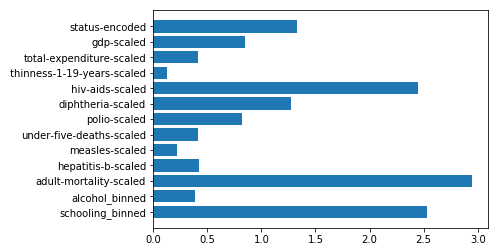

In [179]:
import matplotlib.pyplot as plt
for i,v in enumerate(model.coefficients.values):
	print('Feature: %d, %s, Score: %.5f' % (i, inputFeatures[i],v))
plt.barh([inputFeatures[x] for x in range(len(model.coefficients))], abs(model.coefficients.values))

<BarContainer object of 13 artists>

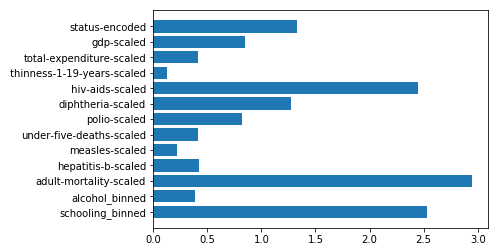

In [180]:
plt.barh([inputFeatures[x] for x in range(len(model.coefficients))], abs(model.coefficients.values))

[2. 3. 4. 5. 6. 7. 8.]


TypeError: unexpected item type: <class 'pandas.core.series.Series'>